## [Notice]

Remaining course schedule related in term project and homework is below.

| Data | Desc. |
| ----------| -------------|
| 5/24 | Term Project Progress Submission data |
| 5/27 | Term Project Progress Presentation (by TAs) |
| 6/2   | HW4 Submit |
| 6/5   | Term Project Final Submission data |
| 6/8, 10 | Term Project Final Presentation (6teams in a day)|

As you can see, schedule is tight with term project process. 
Therefore, this homework consis of previous homework review and simple dicussion problems.

--------------------------

# HW4

If you didn't download this homework by using git _'pull'_ command, please manually download [data file](https://raw.githubusercontent.com/MinhwanYu/cose471_2016/master/data/tripadvisor/hw4_data.csv) and put it in
__data/tripadvisor/hw4_data.csv__
Directory

In [17]:
%matplotlib inline
import json, csv
import pandas as pd
import numpy as np

import glob

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
pd.set_option('display.width', 800)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

## Tripadvisor review data set

In [18]:
reviews = pd.read_csv('data/tripadvisor/hw4_data.csv')

# remove reviews with empty review text
reviews = reviews[~reviews.text.isnull()] 

| field | desc. |
| --------- |-------------| 
| rating | user review rating to restaruant |
| uid     | user unique id |
| text    | user review text |
| rtid    | restaurant unique id |
| label |  if rating > 3, good. otherwise, bad |
| rid     | review unique id |

In [19]:
reviews.head()

,rating,uid,text,rtid,label,rid
0,2,35B7E11E17F184C4EF4D41C746202ADF,Steak House really? Service is absolutely horr...,1,bad,295466028
1,2,7D369B992B8E698723432AC9156E6577,"Food was not very good, little ambiance, music...",1,bad,209023118
2,2,DC5D9DB0F44B41E88414A387A1B16317,Food was good service was horrible. ..seating ...,1,bad,231376390
3,5,2E717E4CE1CDDEC2F8BE7AF9A61E5D9D,I have seen some negative reviews and I am not...,1,good,225374793
4,1,DAF5A94AE30E5CBFA06A3D5AA0BB46A4,"As I had no car, I had no option but to eat he...",1,bad,179102128


### Data Statistics

In [20]:
n_row = len(reviews)
n_reviews = reviews.rid.unique().size
n_restaurants = reviews.rtid.unique().size
n_users = reviews.uid.unique().size
n_good = reviews[reviews.label == 'good'].size
n_bad = reviews[reviews.label == 'bad'].size

print "Number of rows: %i" % n_row
print "Number of reviews: %i" % n_reviews
print "Number of restaurants: %i" % n_restaurants
print "Number of users: %i\n\n" % n_users
print "Number of 'good' label: %i" % n_good
print "Number of 'bad'   label: %i" % n_bad

Number of rows: 12772
Number of reviews: 12762
Number of restaurants: 1254
Number of users: 9130


Number of 'good' label: 70410
Number of 'bad'   label: 6222


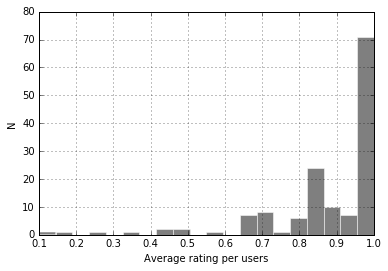

In [21]:
# deep copy 'reviews' data frame 
df = reviews.copy()
df['good'] = df.label == 'good'

# group by user id
grp = df.groupby('uid')
counts = grp.uid.count()
means = grp.good.mean()

means[counts > 5 ].hist(bins=20, edgecolor='w', lw=1, color='k', alpha=0.5)
plt.xlabel("Average rating per users")
plt.ylabel("N")

## The vector space model

If you passed the information retrieval course, you already know what VSM (vector space model) is.

Otherwise, please read below description.

----------------------------

__reference : [Stanford IR-book](http://nlp.stanford.edu/IR-book/)__

Let us define the vector derived from document d by $\bar V(d)$. What does this mean? Each document is considered to be a vector made up from a vocabulary, where there is one axis for each term in the vocabulary.

To define the vocabulary, we take a union of all words we have seen in all documents. We then just associate an array index with them. So "hello" may be at index 5 and "world" at index 99.

Then the document

"hello world world"

would be indexed as

`[(5,1),(99,2)]`

along with a dictionary

``
5: Hello
99: World
``

so that you can see that our representation is one of a sparse array.

Then, a set of documents becomes, in the usual `sklearn` style, a sparse matrix with rows being sparse arrays and columns "being" the features, ie the vocabulary. I put "being" in quites as the layout in memort is that of a matrix with many 0's, but, rather, we use the sparse representation we talked about above.

Notice that this representation loses the relative ordering of the terms in the document. That is "cat ate rat" and "rat ate cat" are the same. Thus, this representation is also known as the Bag-Of-Words representation.

Here is another example, from the book quoted above, although the matrix is transposed here so that documents are columns:

![novel terms](img/hw4/terms.png)

Such a matrix is also catted a Term-Document Matrix. Here, the terms being indexed could be stemmed before indexing; for instance, jealous and jealousy after stemming are the same feature. One could also make use of other "Natural Language Processing" transformations in constructing the vocabulary. We could use Lemmatization, which reduces words to lemmas: work, working, worked would all reduce to work. We could remove "stopwords" from our vocabulary, such as common words like "the". We could look for particular parts of speech, such as adjectives. This is often done in Sentiment Analysis. And so on. It all deoends on our application.

From the book:
>The standard way of quantifying the similarity between two documents $d_1$ and $d_2$  is to compute the cosine similarity of their vector representations $\bar V(d_1)$ and $\bar V(d_2)$:

$$S_{12} = \frac{\bar V(d_1) \cdot \bar V(d_2)}{|\bar V(d_1)| \times |\bar V(d_2)|}$$

![Vector Space Model](img/hw4/vsm.png)


>There is a far more compelling reason to represent documents as vectors: we can also view a query as a vector. Consider the query q = jealous gossip. This query turns into the unit vector $\bar V(q)$ = (0, 0.707, 0.707) on the three coordinates below. 

![novel terms](img/hw4/terms2.png)

>The key idea now: to assign to each document d a score equal to the dot product:

$$\bar V(q) \cdot \bar V(d)$$

This we can use this simple Vector Model as a Search engine or text analysis.

### code example

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

example_doc = [
    'This is the first sentence.',
    'Creating BOW step by step.',
    'This is the last sentence.'
]

print '# Original text is \n', '\n'.join(example_doc)

vectorizer = CountVectorizer(min_df=0)

vectorizer.fit(example_doc)
x = vectorizer.transform(example_doc)
print '# Word Vector\n', x

bow = x.toarray()

bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
bow_df

# Original text is 
This is the first sentence.
Creating BOW step by step.
This is the last sentence.
# Word Vector
  (0, 3)	1
  (0, 4)	1
  (0, 6)	1
  (0, 8)	1
  (0, 9)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 7)	2
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 8)	1
  (2, 9)	1


,bow,by,creating,first,is,last,sentence,step,the,this
0,0,0,0,1,1,0,1,0,1,1
1,1,1,1,0,0,0,0,2,0,0
2,0,0,0,0,1,1,1,0,1,1


In [23]:
def make_xy(reviews, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(reviews.text)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (reviews.label == 'good').values.astype(np.int)
    return X, y

X, y = make_xy(reviews)

## Naive Bayes

We already used Naive Bayes classifier in HW2.

But it was not discussed in the course and homework.

Let's learn more about the Naive Bayes.



$$P(c|d) \propto P(d|c) P(c) $$

$$P(d|c)  = \prod_k P(t_k | c) $$

the conditional independence assumption.

Then we see that for which c is $P(c|d)$ higher.

For floating point underflow we change the product into a sum by going into log space. So:

$$log(P(d|c))  = \sum_k log (P(t_k | c)) $$

But we must also handle non-existent terms, we cant have 0's for them:

$$P(t_k|c) = \frac{N_{kc}+\alpha}{N_c+\alpha N_{feat}}$$

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y)
clf = MultinomialNB().fit(xtrain, ytrain)
print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtest, ytest))

MN Accuracy: 94.71%


In [25]:
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print "Accuracy on training data: %f" % (training_accuracy)
print "Accuracy on test data:     %f" % (test_accuracy)

Accuracy on training data: 0.965132
Accuracy on test data:     0.947072


This model seemed to work find. But we didn't determine the parameters of the model. Through Corss-Validation, let's set the parameter.

### Cross-Validation and hyper-parameter fitting

We use [KFold]](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html) here as we will want to also set parameters in the CountVectorizer.

You can also use an [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) in addition to `KFold`

In [26]:
from sklearn.cross_validation import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(y.size, nfold): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

We use the log-[likelihood](https://en.wikipedia.org/wiki/Likelihood_function) as the score here. 

Since Naive Bayes classifiers are often used in asymmetric situations, it might help to actually maximize probability on the validation folds rather than just accuracy.

Notice something else about using a custom score function. It allows us to do a lot of the choices with the Decision risk we care about (-profit for example) directly on the validation set, rather than comparing ROC curves on the test set. You will often find people using `roc_auc`, precision, recall, or `F1-score` as risks or scores.

In [27]:
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    bad = y == 0
    good = ~bad
    
    return prob[bad, 0].sum() + prob[good, 1].sum()

We'll cross-validate over the regularization parameter $\alpha$ and the `min_df` of the `CountVectorizer`.

>min_df: When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.
>
> [reference : http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html ]

Lets set up the train and test masks first:

In [28]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(reviews.shape[0]), train_size=0.7)
mask=np.ones(reviews.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [50]:
#the grid of parameters to search over
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3]

In [51]:
#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
maxscore=-np.inf
for alpha in alphas:
    for min_df in min_dfs:         
        vectorizer = CountVectorizer(min_df = min_df)       
        Xthis, ythis = make_xy(reviews, vectorizer)
        Xtrainthis=Xthis[mask]
        ytrainthis=ythis[mask]
        clf = MultinomialNB(alpha=alpha)
        cvscore = cv_score(clf, Xtrainthis, ytrainthis, log_likelihood)
        print "alpha: %f \t dfs: %f\t cv score: %f" % (alpha, min_df, cvscore)

        if cvscore > maxscore:
            maxscore = cvscore
            best_alpha, best_min_df = alpha, min_df

alpha: 0.000000 	 dfs: 0.000010	 cv score: nan
alpha: 0.000000 	 dfs: 0.000100	 cv score: nan
alpha: 0.000000 	 dfs: 0.001000	 cv score: nan
alpha: 0.100000 	 dfs: 0.000010	 cv score: -607.695284
alpha: 0.100000 	 dfs: 0.000100	 cv score: -550.038243
alpha: 0.100000 	 dfs: 0.001000	 cv score: -523.908639
alpha: 1.000000 	 dfs: 0.000010	 cv score: -743.711729
alpha: 1.000000 	 dfs: 0.000100	 cv score: -521.700949
alpha: 1.000000 	 dfs: 0.001000	 cv score: -538.672770
alpha: 5.000000 	 dfs: 0.000010	 cv score: -4809.736083
alpha: 5.000000 	 dfs: 0.000100	 cv score: -2371.185921
alpha: 5.000000 	 dfs: 0.001000	 cv score: -494.408308
alpha: 10.000000 	 dfs: 0.000010	 cv score: -7308.914015
alpha: 10.000000 	 dfs: 0.000100	 cv score: -4617.560370
alpha: 10.000000 	 dfs: 0.001000	 cv score: -891.518220
alpha: 50.000000 	 dfs: 0.000010	 cv score: -10384.870814
alpha: 50.000000 	 dfs: 0.000100	 cv score: -8787.633035
alpha: 50.000000 	 dfs: 0.001000	 cv score: -4609.513782


In [52]:
print "best alpha: %f" % best_alpha
print "best min_df: %f" % best_min_df

best alpha: 5.000000
best min_df: 0.001000


### Work with the best params

In [53]:
vectorizer = CountVectorizer(min_df=best_min_df)
X, y = make_xy(reviews, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)

# Your code here. Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print "Accuracy on training data: %f" % (training_accuracy)
print "Accuracy on test data:     %f" % (test_accuracy)

Accuracy on training data: 0.952908
Accuracy on test data:     0.942328


## Interpretation

What are the strongly predictive features?

In [54]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:20]]
bad_words = words[ind[-20:]]

good_prob = probs[ind[:20]]
bad_prob = probs[ind[-20:]]

print "Top 20 informative words \t     P(good | word)"
for w, p in zip(good_words, good_prob):
    print "%20s" % w, "%0.2f" % (1 - np.exp(p))
    
print "---------------------------------------------------------"
print "Bottom 20 informative words\t     P(good | word)"
for w, p in zip(bad_words, bad_prob):
    print "%20s" % w, "%0.2f" % (1 - np.exp(p))

Top 20 informative words 	     P(good | word)
           excellent 0.99
           delicious 0.99
           wonderful 0.99
                tour 0.99
               great 0.99
               yummy 0.99
             awesome 0.99
             enjoyed 0.98
             amazing 0.98
             parking 0.98
            favorite 0.98
                love 0.98
              always 0.98
               loved 0.98
           fantastic 0.98
             falafel 0.98
                 fun 0.98
                must 0.98
               tasty 0.98
             perfect 0.98
---------------------------------------------------------
Bottom 20 informative words	     P(good | word)
              lacked 0.50
             charged 0.49
                 tab 0.48
               stale 0.48
             telling 0.48
          overcooked 0.47
            horrible 0.46
             manager 0.46
             mistake 0.46
            mediocre 0.45
               worst 0.43
          complained 0.41
               w

# Problem1

Do you think the informatvie words is reasonable to classify user reviews?

Write your opinion and briefly expalen.

__Answers__: _Write your answer here_

In [92]:
x, y = make_xy(reviews, vectorizer)

prob = clf.predict_proba(x)[:, 0]
predict = clf.predict(x)

miss_bad = np.argsort(prob[y == 0])[:5]
miss_good = np.argsort(prob[y == 1])[-5:]

print "Mis-predicted bad reviews"
print '---------------------------'
for row in miss_bad:
    print reviews[y == 0].text.irow(row)
    print

print "Mis-predicted good reviews"
print '--------------------------'
for row in miss_good:
    print reviews[y == 1].text.irow(row)
    print

Mis-predicted bad reviews
---------------------------
Always tasty food and great bar serves!Bravo! Hubby had chicken piccata with a spot on lemon/caper sauce while I indulged in a penne al forno with rich mushroom/meat sauce. Service always spot on. Old school atmosphere. Sometimes a wait at desirable dinning hours but quickly forgotten with exceptional lounge service.

Went there for lunch and was very disappointed. My friend and I ordered risotto and crab ravioli and their signature meat place as appetizer. The meat plate was pretty good, but way to expensive - $22 for sliced meat and cheese. My crab raviolis were pretty good, I really enjoyed but portion was again way to small for the price. Risotto was a real disaster, it didn't have any flavor and I can do better job home using one of those modern rice cookers with risotto option. Location is really good, I've enjoyed sitting outside and watching people. But I don't think I'm coming back. This place is too touristy and price for 

/usr/local/lib/python2.7/dist-packages/ipykernel-4.3.1-py2.7.egg/ipykernel/__main__.py:12: FutureWarning: irow(i) is deprecated. Please use .iloc[i] or .iat[i]
/usr/local/lib/python2.7/dist-packages/ipykernel-4.3.1-py2.7.egg/ipykernel/__main__.py:18: FutureWarning: irow(i) is deprecated. Please use .iloc[i] or .iat[i]


In [93]:
clf.predict_proba(vectorizer.transform([
            """
            Tartine is one of those bakeries that every raves about and \\
            you\'re supposed to have your socks knocked off every time you go there. """]))

array([[ 0.00202121,  0.99797879]])

# Problem 2

We got the model for user review classification problmes.

How to improve the accuracy of model?

__Answers: __ _write your answer here_

## Callibration

Probabilistic models like the Naive Bayes classifier have the nice property that they compute probabilities of a particular classification -- the predict_proba and predict_log_proba methods of MultinomialNB compute these probabilities.

You should always assess whether these probabilities are calibrated -- that is, whether a prediction made with a confidence of x% is correct approximately x% of the time.

Let's make a plot to assess model calibration. Schematically, we want something like this:

![callibration](img/hw4/callibration.png)

In words, we want to:

- Take a collection of examples, and compute the freshness probability for each using clf.predict_proba
- Gather examples into bins of similar freshness probability (the diagram shows 5 groups -- you should use something closer to 20)
- For each bin, count the number of examples in that bin, and compute the fraction of examples in the bin which are fresh
- In the upper plot, graph the expected P(Fresh) (x axis) and observed freshness fraction (Y axis). Estimate the uncertainty in observed freshness fraction F via the equation 

$$\sigma = \sqrt{\frac{F(1-F)}{N}}$$

- Overplot the line y=x. This is the trend we would expect if the model is perfectly calibrated
- In the lower plot, show the number of examples in each bin

In [55]:
def calibration_plot(clf, xtest, ytest):
    prob = clf.predict_proba(xtest)[:, 1]
    outcome = ytest
    data = pd.DataFrame(dict(prob=prob, outcome=outcome))

    #group outcomes into bins of similar probability
    bins = np.linspace(0, 1, 20)
    cuts = pd.cut(prob, bins)
    binwidth = bins[1] - bins[0]
    
    #freshness ratio and number of examples in each bin
    cal = data.groupby(cuts).outcome.agg(['mean', 'count'])
    cal['pmid'] = (bins[:-1] + bins[1:]) / 2
    cal['sig'] = np.sqrt(cal.pmid * (1 - cal.pmid) / cal['count'])
        
    #the calibration plot
    ax = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    p = plt.errorbar(cal.pmid, cal['mean'], cal['sig'])
    plt.plot(cal.pmid, cal.pmid, linestyle='--', lw=1, color='k')
    plt.ylabel("Empirical P(Good)")
    
    #the distribution of P(fresh)
    ax = plt.subplot2grid((3, 1), (2, 0), sharex=ax)
    
    plt.bar(left=cal.pmid - binwidth / 2, height=cal['count'],
            width=.95 * (bins[1] - bins[0]),
            fc=p[0].get_color())
    
    plt.xlabel("Predicted P(Good)")
    plt.ylabel("Number")

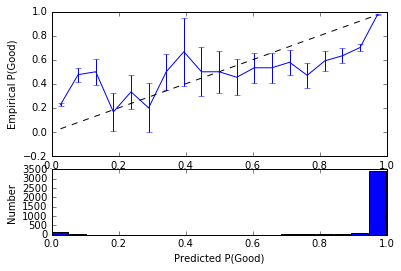

In [56]:
calibration_plot(clf, xtest, ytest)

The model is still slightly over-confident when making low P(Fresh) predictions. However, the calibration plot shows the model is usually within 1 error bar of the expected performance where P(Fresh) >= 0.2. Finally, the model makes less-conclusive predictions on average -- the histogram in the calibration plot is more uniformly distributed, with fewer predictions clustered around P(Fresh) = 0 or 1.


## To improve:

There are many things worth trying. Some examples:

- You could try to build a NB model where the features are word pairs instead of words. This would be smart enough to realize that "not good" and "so good" mean very different things. This technique doesn't scale very well, since these features are much more sparse (and hence harder to detect repeatable patterns within).
- You could try a model besides NB, that would allow for interactions between words -- for example, a Random Forest classifier.
- You could consider adding supplemental features -- information about genre, director, cast, etc.
- You could build a visualization that prints word reviews, and visually encodes each word with size or color to indicate how that word contributes to P(Fresh). For example, really bad words could show up as big and red, good words as big and green, common words as small and grey, etc.

### Better features

We could use TF-IDF instead. What is this? It stands for 

`Term-Frequency X Inverse Document Frequency`.

In the standard `CountVectorizer` model above, we used just the term frequency in a document of words in our vocabulary. In TF-IDF, we weigh this term frequency by the inverse of its popularity in all document. For example, if the word "movie" showed up in all the documents, it would not have much predictive value. By weighing its counts by 1 divides by its overall frequency, we down-weight it. We can then use this tfidf weighted features as inputs to any classifier.

__Note__: If you have a huge data corpus, don't use the implemented method(CounterVectorizer, TfidfVectorizer). 

In [81]:
#http://scikit-learn.org/dev/modules/feature_extraction.html#text-feature-extraction
#http://scikit-learn.org/dev/modules/classes.html#text-feature-extraction-ref
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(min_df=1, stop_words='english')
Xtfidf=tfidfvectorizer.fit_transform(reviews.text)

In [82]:
Xtfidf[0].toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [83]:
Xtfidf.shape

(100000, 64694)

## Density estimation and Unsupervized learning

$$
\renewcommand{\like}{{\cal L}}
\renewcommand{\loglike}{{\ell}}
\renewcommand{\err}{{\cal E}}
\renewcommand{\dat}{{\cal D}}
\renewcommand{\hyp}{{\cal H}}
\renewcommand{\Ex}[2]{E_{#1}[#2]}
\renewcommand{\x}{{\mathbf x}}
\renewcommand{\v}[1]{{\mathbf #1}}
$$

The basic idea in unsupervised learning is to find a compact representation of the data $\{\v{x}_1, \v{x}_2, ..., \v{x}_n\}$, whether these $\v{x}$ come from a class conditional probability distribution like those for males or females, or from all the samples. In other words, we are trying to *estimate a feature distribution* in one case or the other. This is, of course the fundamental problem of statistics, the estimation of probability distributions from data. 

We saw an example of this where we used the maximum likelihood method in logistic regression. There we were trying to estimate $P(y|\v{x}, \v{w})$, a 1-D distribution in y, by finding the most appropriate parameters $\v{w}$. Here we are trying to find some parametrization $\theta_y$ for $P(x|y, \theta_y)$ or $\v{\theta}$ in general for $P(x)$. 

But the basic method we will use remains the same: find the maximum likelihood, or, choose some probability distributions with parameters $\v{\theta}$, find the probability of each point of data if the data had come from this distribution, multiply these probabilities, and maximize the whole thing with respect to the parameters. (Equivalently we minimize the risk defined as the negative of the log-likelihood). 

Consider our heights and weights problem again. Suppose I did not tell you the labels: ie which samples were males and which samples were females. The data would then look like this:

In [57]:
df=pd.read_csv("data/01_heights_weights_genders.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


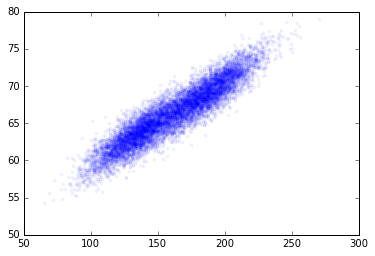

In [90]:
plt.plot(df.Weight, df.Height, '.', alpha=0.05);

The data looks vaguely elliptical and has two "clusters". Besides we know that heights and weights have normal distributions associated with them. So we decide to fit these features, with no knowledge of labels, with a mixture of two 2-D normal distributions. 

$$P(x) = \lambda G_0(\v{x},\theta_0) + (1 - \lambda) G_1(\v{x},\theta_1) $$

What we are doing is a probability distribution estimation on these height and weight features, by fitting for the parameters of whats known as a "mixture of gaussians". 

At this point, you may object, saying that we know from generative classifiers that we can find $P(x)$ as:

$$P(x) = \sum_y P(x|y, \theta_y) P(y).$$

You are right, if you knew the labels. But remember, I have taken these labels away from you, and thus there are no $y$'s, and this formula does not hold any more.

But your objection also makes sense: why not right the input density $P(x)$ as a sum of components, each of which is some other probability distribution. This is the notion of **clustering**: an attempt to find hidden structure in the data. So we can always write:

$$P(x) = \sum_z \lambda_z P(x|z, \theta_z),$$

where $z$ is some **hidden** variable which indexes the number of clusters in our problem. This is a variant of the idea behind the famous **kmeans** clustering algorithm, which we shall encounter in class.

So thats what we do below here, using two clusters based on our visual reconnoiter of the density in the graph above:

### KMeans

In [131]:
Xall=df[['Height', 'Weight']].values
from sklearn.cluster import KMeans
n_clusters=2
clfKMeans = KMeans(n_clusters=n_clusters)
clfKMeans.fit(Xall)

kmeans_labels = clfKMeans.predict(Xall)


array([[  63.42145952,  134.41273247],
       [  69.36477248,  188.93688894]])

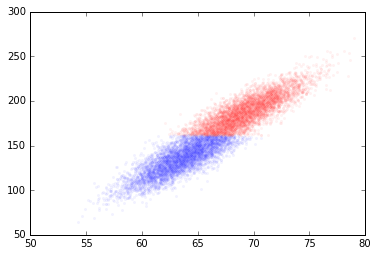

In [143]:

plt.figure()
ax=plt.gca()

for k, col in zip(range(n_clusters), ['blue','red']):
    my_members = kmeans_labels == k
    ax.plot(Xall[my_members, 0], Xall[my_members, 1], 'w',
            markerfacecolor=col, marker='.', alpha=0.05)

### GMM (_Gaussian_ Mixture Model)

In [121]:
Xall=df[['Height', 'Weight']].values
from sklearn.mixture import GMM
n_clusters=2
clfgmm = GMM(n_components=n_clusters, covariance_type="tied")
clfgmm.fit(Xall)
print clfgmm
gmm_means=clfgmm.means_
gmm_covar=clfgmm.covars_
print gmm_means, gmm_covar

GMM(covariance_type='tied', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)
[[  63.7528205   136.62921198]
 [  69.04862707  186.88088569]] [[   7.79270034   47.71088268]
 [  47.71088268  399.64111352]]


How do we use these gaussians to assign clusters? Just like we did in the generative case with LDA, we can ask, which Gaussian is higher at a particular sample. We'll cluster that sample under an artificial label created by that cluster. 

We plot the results below.

In [122]:
from scipy import linalg

def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, color=color, lw=3, fill=False)
    ell.set_clip_box(splot.bbox)
    ell1 = mpl.patches.Ellipse(mean, 1 * v[0] ** 0.5, 1 * v[1] ** 0.5,
                              180 + angle, color=color, lw=3, fill=False)
    ell1.set_clip_box(splot.bbox)
    ell3 = mpl.patches.Ellipse(mean, 3 * v[0] ** 0.5, 3 * v[1] ** 0.5,
                              180 + angle, color=color, lw=3, fill=False)
    ell3.set_clip_box(splot.bbox)
    #ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.add_artist(ell1)
    splot.add_artist(ell3)

[False  True False ...,  True  True  True]
[ True False  True ..., False False False]


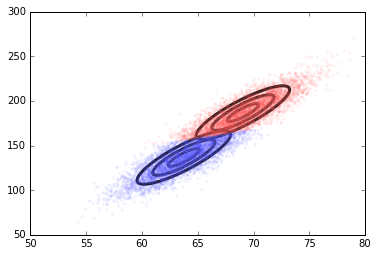

In [123]:
plt.figure()
ax=plt.gca()
plot_ellipse(ax, gmm_means[0], gmm_covar, 'k')
plot_ellipse(ax, gmm_means[1], gmm_covar, 'k')
gmm_labels=clfgmm.predict(Xall)
for k, col in zip(range(n_clusters), ['blue','red']):
    my_members = gmm_labels == k
    ax.plot(Xall[my_members, 0], Xall[my_members, 1], 'w',
            markerfacecolor=col, marker='.', alpha=0.05)

How do we know, a-priori, that two is the right number of clusters? We can try and fit a mixture of 3 gaussians

In [ ]:
n_clusters=3
clfgmm3 = GMM(n_components=n_clusters, covariance_type="tied")
clfgmm3.fit(Xall)
print clfgmm
gmm_means=clfgmm3.means_
gmm_covar=clfgmm3.covars_
print gmm_means, gmm_covar
plt.figure()
ax=plt.gca()
plot_ellipse(ax, gmm_means[0], gmm_covar, 'k')
plot_ellipse(ax, gmm_means[1], gmm_covar, 'k')
plot_ellipse(ax, gmm_means[2], gmm_covar, 'k')
gmm_labels=clfgmm3.predict(Xall)
for k, col in zip(range(n_clusters), ['blue','red', 'green']):
    my_members = gmm_labels == k
    ax.plot(Xall[my_members, 0], Xall[my_members, 1], 'w',
            markerfacecolor=col, marker='.', alpha=0.05)

# Problem3

We should find which custer number is suited in clustering problem. How to find the resaonable cluster size?

Briefly write your opinion.